Solving the gambler problem from the text book demonstrating the use of value iteration as DP solution for MDP.

Let's recall the gambler problem (Example 4.3 in the text book).

In the gambler problem we have 99 states: $s \in \{1, 2, \ldots, 99\}$ and additional two terminal states $s_0$ and $s_{100}$. At each state, the gambler can bet any sum of money up to his current currency (state).

The reward is always 0 unless reached $s_{100}$ and in that case the reward is 1.

In our solution, we will follow the following Value Iteration algorithm from the book:
<img src="files/value_iteration.png">

In [1]:
# Importing numpy
import numpy as np

Initializing V and setting the other values

In [2]:
gamma = 1
ph = 0.4
tol = 0.0001
S = 101  # The 99 states plus the two terminal states s_0 and s_100
V = np.zeros(S)

First let's look at an update of a single state

In [3]:
s = 95
vs = []
new_V = np.zeros(S)
for a in range(1, min(s, 100 - s) + 1):
    # If he wins
    win_s = s + a
    win_r = 0 if win_s < 100 else 1
    win_r += gamma * V[win_s]
    
    # If he loses
    lose_s = s - a
    lose_r = gamma * V[lose_s]
    
    vs.append(ph * win_r + (1 - ph) * lose_r)

new_V[s] = np.max(vs)

In [4]:
print new_V

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.4  0.   0.   0.   0.   0. ]


We can see that the value of V[95] changed to 0.4, why is that? Let's look at all the action values:

<img src="files/max_action.png">

We can see that the max is at a=5 and the value is 0.4.

Now let's run it on all states one iteration. We introduce a new value new_V. In the standard DP solution, the values are not updated until we're done with all states.

In [5]:
new_V = np.zeros(S)
for s in range(1, S - 1):   # Don't want to update the zero state and the last one 
    vs = []

    for a in range(1, min(s, 100 - s) + 1):
        # If he wins
        win_s = s + a
        win_r = 0 if win_s < 100 else 1
        win_r += gamma * V[win_s]

        # If he loses
        lose_s = s - a
        lose_r = gamma * V[lose_s]

        vs.append(ph * win_r + (1 - ph) * lose_r)

    new_V[s] = np.max(vs)  

In [6]:
print new_V

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4
  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4
  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4
  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0. ]


After one iteration, we can see that only the states that can reach the winning state got updated to something bigger than 0.

Let's run another iteration and see that the update propogates to states lower than 50.

In [7]:
V = new_V
new_V = np.zeros(S)
for s in range(1, S - 1):   # Don't want to update the zero state and the last one 
    vs = []

    for a in range(1, min(s, 100 - s) + 1):
        # If he wins
        win_s = s + a
        win_r = 0 if win_s < 100 else 1
        win_r += gamma * V[win_s]

        # If he loses
        lose_s = s - a
        lose_r = gamma * V[lose_s]

        vs.append(ph * win_r + (1 - ph) * lose_r)

    new_V[s] = np.max(vs)

In [8]:
print new_V

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16
  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16
  0.16  0.4   0.4   0.4   0.4   0.4   0.4   0.4   0.4   0.4   0.4   0.4
  0.4   0.4   0.4   0.4   0.4   0.4   0.4   0.4   0.4   0.4   0.4   0.4
  0.4   0.4   0.64  0.64  0.64  0.64  0.64  0.64  0.64  0.64  0.64  0.64
  0.64  0.64  0.64  0.64  0.64  0.64  0.64  0.64  0.64  0.64  0.64  0.64
  0.64  0.64  0.64  0.  ]


As expected we can see that the reward propogated down. 

At each point, we would like to compute the convergance.

In [9]:
delta = np.max(np.abs(new_V - V))
print delta

0.24


We can see that it did not reach convergance, which is not surprising. Now let's run the learning update step few more times until convergance.

In [10]:
while True:
    new_V = np.zeros(S)
    for s in range(1, S - 1):   # Don't want to update the zero state and the last one 
        vs = []

        for a in range(1, min(s, 100 - s) + 1):
            # If he wins
            win_s = s + a
            win_r = 0 if win_s < 100 else 1
            win_r += gamma * V[win_s]

            # If he loses
            lose_s = s - a
            lose_r = gamma * V[lose_s]

            vs.append(ph * win_r + (1 - ph) * lose_r)

        new_V[s] = np.max(vs)
    
    delta = np.max(np.abs(new_V - V))
    print delta
    if delta < 0.001:
        break
    
    V = new_V

0.24
0.144
0.0864
0.05184
0.031104
0.0124416
0.00746496
0.002985984
0.0017915904
0.00107495424
0.000644972544


We can now compute the best policy given the values. Notice that it's the exact same code instead of the change from max to argmax.

In [11]:
def arg_max_with_tol(arr, tol=0.0001):
    """
    Finds the index of the max value in an array. Allows precision error to be ignored and 
    returns the minimum index of all eqaulity. 
    
    This fixes the weird policy plot that is a result of the Python precision problems.
    """
    m = max(arr)
    l = []
    
    for i, val in enumerate(arr):
        if abs(val - m) <= tol:
            return i

In [12]:
policy = np.zeros(S)
for s in range(1, S - 1):   # Don't want to update the zero state and the last one 
    vs = []

    for a in range(1, min(s, 100 - s) + 1):
        # If he wins
        win_s = s + a
        win_r = 0 if win_s < 100 else 1
        win_r += gamma * V[win_s]

        # If he loses
        lose_s = s - a
        lose_r = gamma * V[lose_s]

        vs.append(ph * win_r + (1 - ph) * lose_r)


    # Actions starts from 1 so we need the +1
    policy[s] = arg_max_with_tol(vs) + 1  

Now let's print the policy

/Users/lichman/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<IPython.core.display.Javascript object>


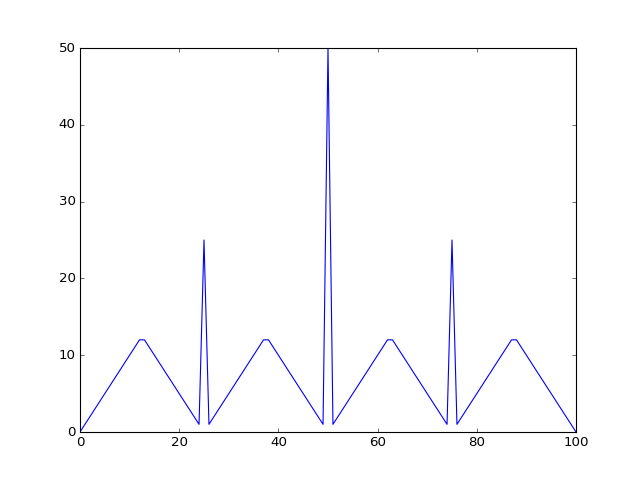

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.plot(policy)
plt.show()

Complete code that does everything including printing during iterations until reaching convergance.

<IPython.core.display.Javascript object>


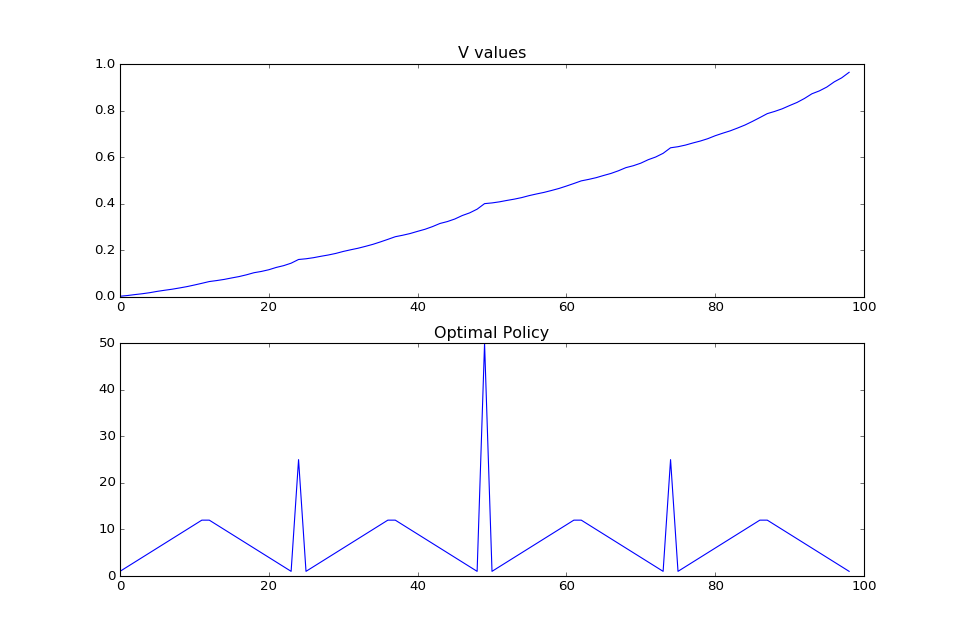

Reached convergance


In [14]:
import time

gamma = 1
ph = 0.4
tol = 0.0001
# Initializing V(s)
S = 101  # The 99 states plus the two terminal states s_0 and s_100
V = np.zeros(S)

deltas = []
fig, axarr = plt.subplots(2, sharex=True, figsize=(12, 8))
plt.ion()
fig.show()
fig.canvas.draw()

policy = np.zeros(S)
for i in range(100):
    new_V = np.zeros(S)
    for s in range(1, S - 1):   # Don't want to update the zero state and the last one 
        vs = []

        for a in range(1, min(s, 100 - s) + 1):
            # If he wins
            win_s = s + a
            win_r = 0 if win_s < 100 else 1
            win_r += gamma * V[win_s]

            # If he loses
            lose_s = s - a
            lose_r = gamma * V[lose_s]

            vs.append(ph * win_r + (1 - ph) * lose_r)

        new_V[s] = max(vs)  
        policy[s] = arg_max_with_tol(vs) + 1

    delta = np.max(np.abs(new_V - V))
    deltas.append(delta)
    
    if delta < tol:
        print 'Reached convergance'
        break
    V = new_V    
    
    if i % 2 == 0:
        time.sleep(1)
        axarr[0].clear()
        axarr[0].plot(V[1:-1])
        axarr[0].set_title('V values')
        
        axarr[1].clear()
        axarr[1].plot(policy[1:-1])
        axarr[1].set_title('Optimal Policy')
        
        fig.canvas.draw()